In [34]:
import numpy as np

##code to generate irrational planes from hyperbolic matrices.
def hyperbolic_matrix(dim,rand = False):
    #returns a random, dim dimensional symmetric hyperbolic matrix
    U = np.eye(dim)
    if not rand:
        for i in range(dim):
            for j in range(dim):
                if i < j:
                    U[i][j] = 1

    else:
        for i in range(dim):
            for j in range(dim):
                if i < j:
                    U[i][j] = np.random.randint(1,high=5)
    L = U.T
    A = L @ U
    return A

def irrational_plane(A, dim):
    #returns a dim-1 dimensional eigen subspace of a dim dimensional hyperbolic matrix
    subspace_dim = dim - 1
    eigenvals,eigenvecs = np.linalg.eig(A)
    eigenvectors = []
    for i in range(dim):
        eigenvectors.append(eigenvecs[:,i])
    return eigenvectors[:subspace_dim]

##code to project aperiodic points onto a plane
def point_projection(vectors,point):
    #returns the 2 dimensional representation of the point projection,
    #ie the coefficients multiplied by the eigenvectors to create the ortho projection
    projection = np.zeros(len(vectors))
    for i in range(len(vectors)):
        projection[i] = point.dot(vectors[i]) #coefficient
    return projection

def reducedDimensionMatrix(eig, dim):
    reddim = dim - 1
    r = np.eye(reddim)
    for i in range(reddim):
        for j in range(reddim):
            r[j,i] = eig[i][j]
    return r
def solveForZ(eig, matrix, x,dim):
    reddim = dim - 1
    rVector = np.linalg.solve(matrix,x)
    z=0
    for i in range(reddim):
        z += rVector[i]*eig[i][reddim]
    return z

def aperiodic_points(R,dim,eig,borderSize,position):
    #x1<x2, y1<y1
    #input a range of integers to iterate over R, a dimension, a hyperbolic matrix, and a window size - get in return a set of aperiodic points within the range
    points = []
    patch_center = sum([position[i]*eig[i] for i in range(dim-1)]) #3d representation of position on plane
    patch_center = np.floor(patch_center).astype(int)
    rdm = reducedDimensionMatrix(eig, dim)
    x = patch_center[0]
    y = patch_center[1]
    
    for i in range(x-R,x+R):
        for j in range(y-R,y+R):
            x_=np.array([i,j])
            z = solveForZ(eig, rdm, x_,dim)
            borderFloor = np.floor((z-borderSize))
            borderRoof = np.floor((z+borderSize+1))
            for point in range( borderFloor.astype(int), borderRoof.astype(int)):
                if abs(z-point) < borderSize:
                    print("point: ", [i,j,point])
                    projected = point_projection(eig, np.array([i,j,point]))
                    print("projection: ", projected)
                    points.append(projected)
    return points

[array([-0.32798528, -0.59100905, -0.73697623]), array([-0.73697623, -0.32798528,  0.59100905])]


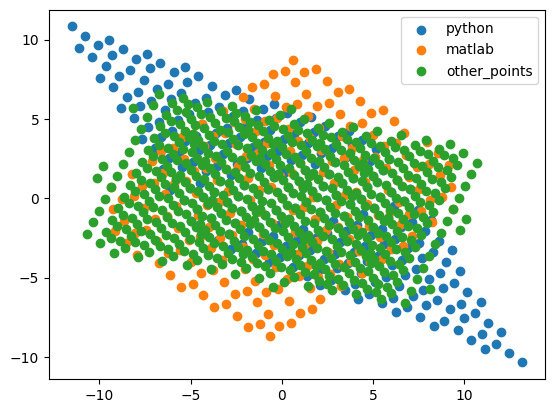

In [39]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

A = hyperbolic_matrix(3)
eig = irrational_plane(A,3)
print(eig)
points = np.array(aperiodic_points(4,3,eig,2,np.array([0,0,0]))).transpose()
matlab_points = loadmat('matlab_points.mat')
matlab_points = matlab_points['sp']

other_points = loadmat('method1_matlab_points.mat')
other_points = other_points['points']

plt.scatter(points[0],points[1], label = 'python')
plt.scatter(matlab_points[0],matlab_points[1],label='matlab')
plt.scatter(other_points[0],other_points[1],label='other_points')
plt.legend()
plt.show()

In [37]:
points_t = points.transpose()
matlab_points_t = matlab_points.transpose()
other_points_t = other_points.transpose()

yahoo


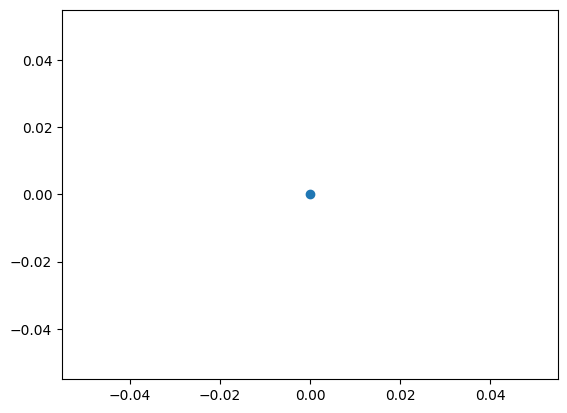

In [38]:
agree = []

for point in points_t:
    for matlab_point in other_points_t:
        if (point == matlab_point).all():
            print("yahoo")
            agree.append(point)

agree = np.array(agree).transpose()

plt.scatter(agree[0],agree[1])

In [11]:
path = loadmat('5m.mat')
paths = path['paths']

In [12]:
#coord x k-thousandth collision x trial
print(paths.shape)

(2, 5001, 2000)


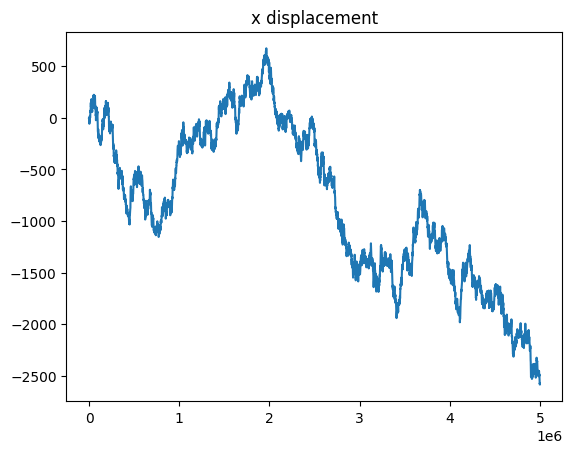

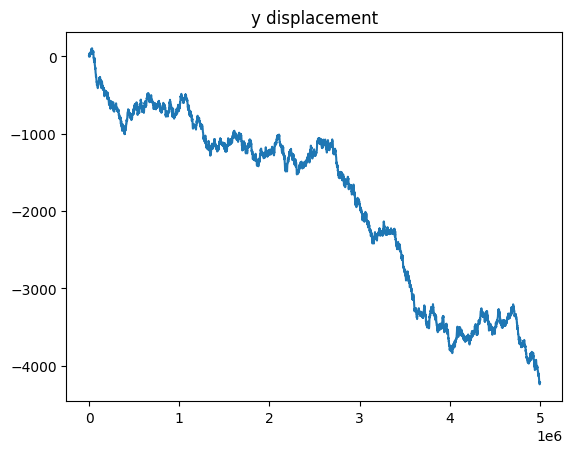

In [16]:
x = np.arange(0,5000001,1000)
plt.plot(x,paths[0,:,1])
plt.title("x displacement")
plt.show()

plt.plot(x,paths[1,:,1])
plt.title("y displacement")
plt.show()

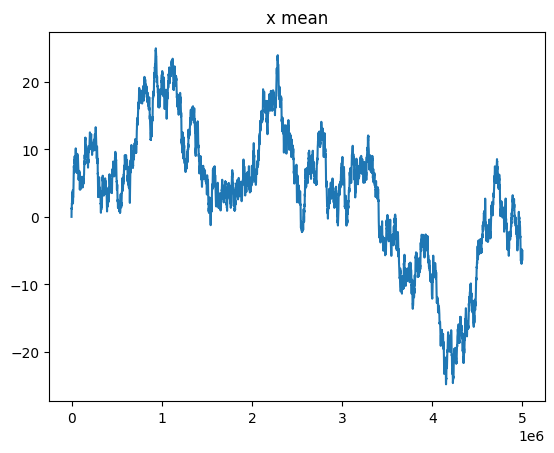

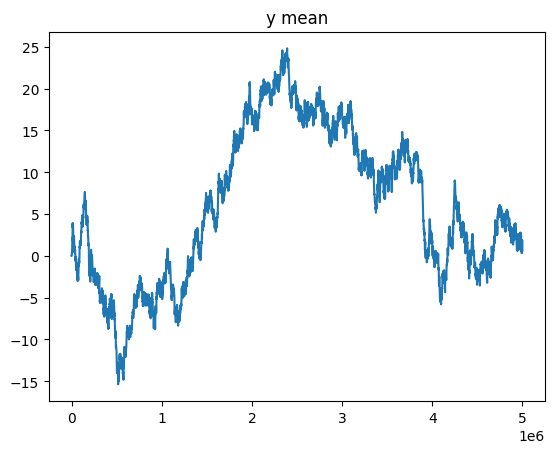

In [17]:
mean_x = paths[0,:,:]
mean_y = paths[1,:,:]

mean_x = np.mean(mean_x,axis = 1)
mean_y = np.mean(mean_y,axis = 1)

plt.plot(x,mean_x)
plt.title("x mean")
plt.show()

plt.plot(x,mean_y)
plt.title("y mean")
plt.show()